<a href="https://colab.research.google.com/github/jrmaza/machine-learning/blob/main/pokemon_legendary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
pokemondf = pd.read_csv('/content/pokemon.csv')

In [7]:
pokemondf.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
pokemon = pokemondf.drop(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'Generation'], axis=1)

In [9]:
pokemon

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,True
796,50,160,110,160,110,110,True
797,80,110,60,150,130,70,True
798,80,160,60,170,130,80,True


In [10]:
import sklearn 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
pokemon['Legendary'] = lb.fit_transform(pokemon['Legendary'])
pokemon

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,0
1,60,62,63,80,80,60,0
2,80,82,83,100,100,80,0
3,80,100,123,122,120,80,0
4,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,1
796,50,160,110,160,110,110,1
797,80,110,60,150,130,70,1
798,80,160,60,170,130,80,1


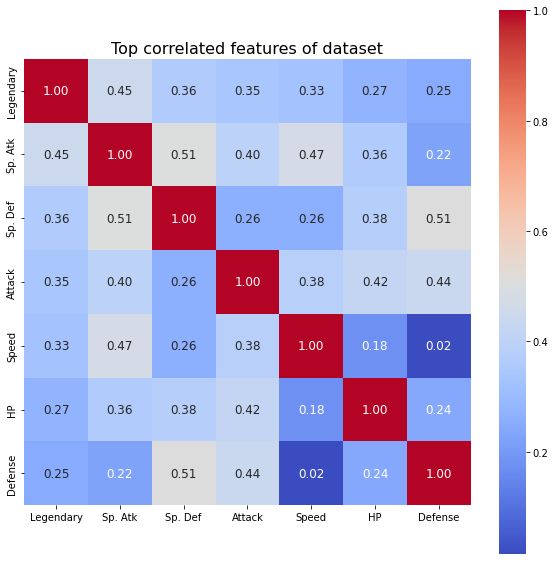

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


top = 15
corr = pokemon.corr()
top15 = corr.nlargest(top, 'Legendary')['Legendary'].index
corr_top15 = pokemon[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

In [19]:
x = pokemon.drop(['Legendary'], axis=1)
x

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [18]:
y = pokemon.loc[:,'Legendary']
y

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [22]:
model = LogisticRegression()
model

LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[109,   3],
       [  3,   5]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.62      0.62      0.62         8

    accuracy                           0.95       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.95      0.95      0.95       120



In [61]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 

In [62]:
decision_tree.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [63]:
y_pred = decision_tree.predict(x_test)

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[109,   3],
       [  2,   6]])

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.67      0.75      0.71         8

    accuracy                           0.96       120
   macro avg       0.82      0.86      0.84       120
weighted avg       0.96      0.96      0.96       120

